**Author:** [Riccardo Guidotti](http://kdd.isti.cnr.it/people/riccardo-guidotti)  
**Python version:**  3.x

In [2]:
%matplotlib inline
%matplotlib inline

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import time
from collections import defaultdict
import random
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
from matplotlib.dates import DateFormatter
plt.rcParams['figure.dpi']=500  #resolution

from collections import defaultdict

In [1]:
def draw_list(ts_list, attribute, ts_number=1000, time = None , formatter = None):
    if ts_number >= len(ts_list): ts_number = len(ts_list)-1
    fig = plt.figure()
    ax = fig.subplots()
    for ts in ts_list[:ts_number]:
        if time == None: index = list(ts.index.values)
        else: index= ts[time]
        ax.plot(index, ts[attribute])
    ax.set_ylabel(attribute)
    if formatter !=None:
        date_form = DateFormatter(formatter)
        ax.xaxis.set_major_formatter(date_form)
    plt.show()

# Data Preparation

In [3]:
time_col = 'date'

attributes = ['date', 'Temperature', 'Humidity', 'Light', 'CO2', 'HumidityRatio', 'Occupancy']


df=pd.read_csv(r'../../data/datatraining.txt')
df[time_col] =  pd.to_datetime(df[time_col], format = '%Y-%m-%d %H:%M:%S')
df['Weekday']=df[time_col].apply(lambda x:x.weekday())

mon1=df[df['Weekday']==0][attributes].copy()
tue1=df[df['Weekday']==1][attributes].copy()  #missing part of the day
wed1=df[df['Weekday']==2][attributes].copy() #incompleted too
thu1=df[df['Weekday']==3][attributes].copy()
fri1=df[df['Weekday']==4][attributes].copy()
sat1=df[df['Weekday']==5][attributes].copy()
sun1=df[df['Weekday']==6][attributes].copy()
    
weekdays1 = [thu1,fri1,sat1,sun1,mon1] #I dont want incompleted days, so wednesday and tuesday are excluded



df=pd.read_csv(r'../../data/datatest2.txt')
df[time_col] =  pd.to_datetime(df[time_col], format = '%Y-%m-%d %H:%M:%S')
df['Weekday']=df[time_col].apply(lambda x:x.weekday())
                                 
mon2=df[df['Weekday']==0][attributes].copy()
tue2=df[df['Weekday']==1][attributes].copy()  #missing part of the day
wed2=df[df['Weekday']==2][attributes].copy() #incompleted too
thu2=df[df['Weekday']==3][attributes].copy()
fri2=df[df['Weekday']==4][attributes].copy()
sat2=df[df['Weekday']==5][attributes].copy()
sun2=df[df['Weekday']==6][attributes].copy()
    
weekdays2 = [thu2,fri2,sat2,sun2,mon2] #I dont want incompleted days, so wednesday and tuesday are excluded


## week list

C:\Users\carlo\Anaconda3\lib\site-packages\pandas\plotting\_matplotlib\converter.py:103: FutureWarning: Using an implicitly registered datetime converter for a matplotlib plotting method. The converter was registered by pandas on import. Future versions of pandas will require you to explicitly register matplotlib converters.

To register the converters:
	>>> from pandas.plotting import register_matplotlib_converters
	>>> register_matplotlib_converters()
  warnings.warn(msg, FutureWarning)


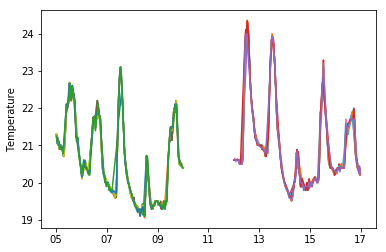

In [4]:
week_size = 144
week_list = []

week1 = pd.DataFrame()
for day in weekdays1:
    day.sort_values(time_col, inplace=True)#first of all: order
    week1 = week1.append(day, ignore_index=True )    ##a week

week1_list = []
tmp = week1.copy() 
while(len(tmp)>=week_size):
    ts = tmp.sample(week_size)
    ts.sort_values(time_col, inplace=True)
    week1_list.append(ts)
    week_list.append(ts)
    tmp.drop(ts.index, axis=0, inplace=True) #remove the sample just extract

    
week2 = pd.DataFrame()
for day in weekdays2:    
    day.sort_values(time_col, inplace=True)#first of all: order
    week2 = week2.append(day, ignore_index=True)    ##a week
    
week2_list = []
tmp = week2.copy() 
while(len(tmp)>=week_size):
    ts = tmp.sample(week_size)
    ts.sort_values(time_col, inplace=True)
    week2_list.append(ts)
    week_list.append(ts)
    tmp.drop(ts.index, axis=0, inplace=True) #remove the sample just extract

    
random.shuffle(week_list)
draw_list(week_list, 'Temperature', 15, time = time_col ,formatter = '%d')

## day_list

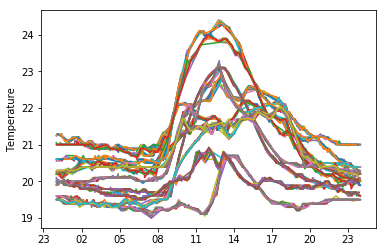

In [5]:
day_list = []
day_size = 120

day1_list=[]
for day in weekdays1:
    day_copy =day.copy()
    day_copy.reset_index(drop=True, inplace=True)
    while (len(day_copy)>= day_size):
        day_copy['time']=day_copy[time_col].apply(lambda x: str(x)[11:19]) #get string %H:%M:%S and lose info about the daydate
        day_copy['time']=pd.to_datetime(day_copy['time'], format='%H:%M:%S')  #now a date is setted automaticaly for all records
        ts=day_copy.sample(day_size)
        ts.sort_values('time', inplace=True) #necessary to order to be sure
        day_list.append(ts)
        day1_list.append(ts)
        day_copy.drop(ts.index, axis=0, inplace=True) #remove the sample just extra


day2_list = []
for day in weekdays2:
    day_copy =day.copy()
    day_copy.reset_index(drop=True, inplace=True)
    while (len(day_copy)>= day_size):
        day_copy['time']=day_copy[time_col].apply(lambda x: str(x)[11:19]) #get string %H:%M:%S and lose info about the daydate
        day_copy['time']=pd.to_datetime(day_copy['time'], format='%H:%M:%S')  #now a date is setted automaticaly for all records
        ts=day_copy.sample(day_size)
        ts.sort_values('time', inplace=True) #necessary to order to be sure
        day_list.append(ts)
        day2_list.append(ts)
        day_copy.drop(ts.index, axis=0, inplace=True) #remove the sample just extract


draw_list(day_list, 'Temperature', time = 'time', formatter = '%H')

## day_split

C:\Users\carlo\Anaconda3\lib\site-packages\ipykernel_launcher.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  # Remove the CWD from sys.path while we load stuff.
C:\Users\carlo\Anaconda3\lib\site-packages\ipykernel_launcher.py:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


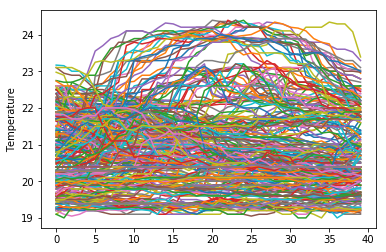

In [6]:
splits = 3 #night #morning #afternoon #evening 
part_size = day_size // splits
day_split = []

day1_split = []
for ts in day1_list:
    copy= ts.copy()
    for i in range(splits):
        day_part = copy[part_size*i:part_size*(i+1)]
        day_part['part'] = i    #saving the part of the days
        day_split.append(day_part)
        day1_split.append(day_part)
    
day2_split = []
for ts in day2_list:
    copy= ts.copy()
    for i in range(splits):
        day_part = copy[part_size*i:part_size*(i+1)]
        day_part['part'] = i    #saving the part of the days
        day_split.append(day_part)
        day2_split.append(day_part)

for day in day1_split:
    day.reset_index(drop=True, inplace=True)  
for day in day2_split:
    day.reset_index(drop=True, inplace=True)  
for day in day_split:
    day.reset_index(drop=True, inplace=True)    


    
draw_list(day_split, 'Temperature')



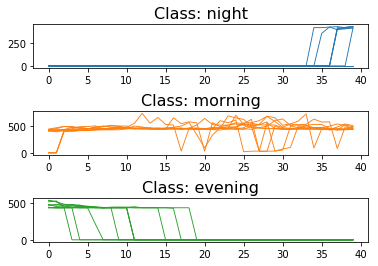

In [7]:
from sklearn import preprocessing

ts_list = []
for temp in day_split:
    ts = temp['Light'].copy()
    ts_list.append(ts)

ts_array = []
ts_size = len(day_split[1])
for ts in ts_list:
    ts_array.append(np.array(ts).reshape(ts_size,))
    
X = np.array(ts_array)

def daypart(ts): 
     if ts['date'][ts.index[ts_size//2]].hour < 8 : return 'night'
     elif ts['date'][ts.index[ts_size//2]].hour < 16 : return 'morning'
     else: return 'evening'

labels = np.array([daypart(ts) for ts in day_split])

y = preprocessing.LabelEncoder().fit_transform(labels)
plt.figure()
for i, classe in enumerate(['night','morning', 'evening']):
    plt.subplot(3, 1, i + 1)
    for x in X[labels == classe][:10]:
        plt.plot(x, color='C'+str(i), linewidth=0.9)
    plt.title('Class: {}'.format(classe), fontsize=16)

#plt.tight_layout()
plt.subplots_adjust(hspace=1)
plt.show()


ts_list = []
for temp in day_split:
    ts = temp['Temperature'].copy()
    ts_list.append(ts)

ts_array = []
ts_size = len(day_split[1])
for ts in ts_list:
    ts_array.append(np.array(ts).reshape(ts_size,))
    
X = np.array(ts_array)

def daypart(ts): 
     if ts['date'][ts.index[ts_size//2]].hour < 12 : return 'morning'
     elif ts['date'][ts.index[ts_size//2]].hour < 23 : return 'evening'
    # elif ts['date'][ts.index[ts_size//2]].hour < 18 : return 'afternoon'
    # else: return 'evening'
y = np.array([daypart(ts) for ts in day_split])


plt.figure()
for i, classe in enumerate(['morning','evening']):
    plt.subplot(2, 1, i + 1)
    for x in X[y == classe]:
        plt.plot(x, color='C'+str(i), linewidth=0.9)
    plt.title('Class: {}'.format(classe), fontsize=16)

#plt.tight_layout()
plt.subplots_adjust(hspace=0.7)
plt.show()


# Data Normalization

In [8]:
from keras.optimizers import Adagrad
from tslearn.shapelets import ShapeletModel
from tslearn.shapelets import grabocka_params_to_shapelet_size_dict

from tslearn.preprocessing import TimeSeriesScalerMinMax

from sklearn.metrics import accuracy_score, f1_score, classification_report
from sklearn.metrics import roc_curve, auc, roc_auc_score
from sklearn.model_selection import train_test_split, cross_val_score 

Using TensorFlow backend.
C:\Users\carlo\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:144: FutureWarning: The sklearn.cluster.k_means_ module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.cluster. Anything that cannot be imported from sklearn.cluster is now part of the private API.
  warnings.warn(message, FutureWarning)


In [9]:
scaler = TimeSeriesScalerMinMax()
X = scaler.fit_transform(X).reshape(X.shape[0], X.shape[1])

C:\Users\carlo\Anaconda3\lib\site-packages\tslearn\preprocessing.py:179: RuntimeWarning: invalid value encountered in true_divide
  X_ = nomin / range_t + self.value_range[0]


# Data Partitioning

In [10]:
from sklearn.model_selection import train_test_split, cross_val_score 

from sklearn.metrics import accuracy_score, f1_score, classification_report
from sklearn.metrics import roc_curve, auc, roc_auc_score

In [53]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=100, stratify=y)

# Shaplet Classifier

In [12]:
n_ts, ts_sz = X_train.shape
n_classes = len(set(y))

# Set the number of shapelets per size as done in the original paper
shapelet_sizes = grabocka_params_to_shapelet_size_dict(n_ts=n_ts,
                                                       ts_sz=ts_sz,
                                                       n_classes=n_classes,
                                                       l=0.1,
                                                       r=1)

print('n_ts', n_ts)
print('ts_sz', ts_sz)
print('n_classes', n_classes)
print('shapelet_sizes', shapelet_sizes)

n_ts 252
ts_sz 40
n_classes 3
shapelet_sizes {4: 4}


In [13]:
# Define the model using parameters provided by the authors (except that we use
# fewer iterations here)
shp_clf = ShapeletModel(n_shapelets_per_size=shapelet_sizes,
                        optimizer="sgd",
                        weight_regularizer=.01,
                        max_iter=200,
                        verbose=1)

In [14]:
shp_clf.fit(X_train, y_train)

ValueError: Input contains NaN, infinity or a value too large for dtype('float64').

In [ ]:
y_pred = shp_clf.predict(X_test)

In [ ]:
print('Accuracy %s' % accuracy_score(y_test, y_pred))
print('F1-score %s' % f1_score(y_test, y_pred, average=None))
print(classification_report(y_test, y_pred))

# Shaplet-distances-based Classifier

In [ ]:
X_train2 = shp_clf.transform(X_train)

In [ ]:
X_train2.shape

In [ ]:
X_train2

In [ ]:
X_test2 = shp_clf.transform(X_test)

In [11]:
from sklearn.neighbors import KNeighborsClassifier

In [ ]:
clf = KNeighborsClassifier(n_neighbors=5, weights='uniform')
clf.fit(X_train2, y_train)

In [ ]:
y_pred = clf.predict(X_test2)

print('Accuracy %s' % accuracy_score(y_test, y_pred))
print('F1-score %s' % f1_score(y_test, y_pred, average=None))
print(classification_report(y_test, y_pred))

In [13]:
from sklearn.tree import DecisionTreeClassifier

In [ ]:
clf = DecisionTreeClassifier(max_depth=8, random_state=42)
clf.fit(X_train2, y_train)

y_pred = clf.predict(X_test2)

print('Accuracy %s' % accuracy_score(y_test, y_pred))
print('F1-score %s' % f1_score(y_test, y_pred, average=None))
print(classification_report(y_test, y_pred))

# Feature-based Classifier

In [12]:
import scipy.stats as stats

In [140]:
def calculate_features(values):
    features = {
        'avg': np.mean(values),
        'std': np.std(values),
        'var': np.var(values),
        'med': np.median(values),
        '10p': np.percentile(values, 10),
        '25p': np.percentile(values, 25),
        '50p': np.percentile(values, 50),
        '75p': np.percentile(values, 75),
        '90p': np.percentile(values, 90),
        'iqr': np.percentile(values, 75) - np.percentile(values, 25),
        'cov': 1.0 * np.mean(values) / np.std(values),
        'skw': stats.skew(values),
        'kur': stats.kurtosis(values)
    }

    return features

In [141]:
X_train3 = np.array([list(calculate_features(x).values()) for x in X_train])

In [142]:
X_train3.shape

(252, 13)

In [143]:
X_train3

array([[ 0.21116667,  0.2110997 ,  0.04456308, ...,  1.00031723,
         1.9074237 ,  4.28619804],
       [ 0.36937984,  0.33437416,  0.11180608, ...,  1.10469015,
         0.60913944, -1.03806267],
       [ 0.37765377,  0.28451729,  0.08095009, ...,  1.32734911,
         0.59343387, -0.53572424],
       ...,
       [ 0.43857527,  0.28504991,  0.08125345, ...,  1.53859116,
        -0.11239812, -1.22080015],
       [ 0.61840449,  0.25241091,  0.06371127, ...,  2.44999108,
        -0.43756483, -0.78965799],
       [ 0.45008645,  0.25692962,  0.06601283, ...,  1.75178886,
         0.16493665, -0.71882434]])

In [144]:
X_test3 = np.array([list(calculate_features(x).values()) for x in X_test])

In [145]:
clf = DecisionTreeClassifier(max_depth=8, random_state=42)
clf.fit(X_train3, y_train)

y_pred = clf.predict(X_test3)

print('Accuracy %s' % accuracy_score(y_test, y_pred))
print('F1-score %s' % f1_score(y_test, y_pred, average=None))
print(classification_report(y_test, y_pred))

Accuracy 0.7129629629629629
F1-score [0.73239437 0.66666667 0.73684211]
              precision    recall  f1-score   support

           0       0.74      0.72      0.73        36
           1       0.70      0.64      0.67        36
           2       0.70      0.78      0.74        36

    accuracy                           0.71       108
   macro avg       0.71      0.71      0.71       108
weighted avg       0.71      0.71      0.71       108



# Time Series Classifier

In [146]:
clf = KNeighborsClassifier(n_neighbors=5, weights='uniform')
clf.fit(X_train, y_train)

y_pred = clf.predict(X_test)

print('Accuracy %s' % accuracy_score(y_test, y_pred))
print('F1-score %s' % f1_score(y_test, y_pred, average=None))
print(classification_report(y_test, y_pred))

Accuracy 0.7962962962962963
F1-score [0.81012658 0.89473684 0.6557377 ]
              precision    recall  f1-score   support

           0       0.74      0.89      0.81        36
           1       0.85      0.94      0.89        36
           2       0.80      0.56      0.66        36

    accuracy                           0.80       108
   macro avg       0.80      0.80      0.79       108
weighted avg       0.80      0.80      0.79       108



In [147]:
clf = DecisionTreeClassifier(max_depth=8, random_state=42)
clf.fit(X_train, y_train)

y_pred = clf.predict(X_test)

print('Accuracy %s' % accuracy_score(y_test, y_pred))
print('F1-score %s' % f1_score(y_test, y_pred, average=None))
print(classification_report(y_test, y_pred))

Accuracy 0.7685185185185185
F1-score [0.74285714 0.84507042 0.72      ]
              precision    recall  f1-score   support

           0       0.76      0.72      0.74        36
           1       0.86      0.83      0.85        36
           2       0.69      0.75      0.72        36

    accuracy                           0.77       108
   macro avg       0.77      0.77      0.77       108
weighted avg       0.77      0.77      0.77       108



In [148]:
from pyts.classification import KNeighborsClassifier

In [149]:
clf = KNeighborsClassifier(metric='dtw_sakoechiba')
clf.fit(X_train, y_train)

y_pred = clf.predict(X_test)

print('Accuracy %s' % accuracy_score(y_test, y_pred))
print('F1-score %s' % f1_score(y_test, y_pred, average=None))
print(classification_report(y_test, y_pred))

Accuracy 0.9444444444444444
F1-score [0.94736842 0.97297297 0.90909091]
              precision    recall  f1-score   support

           0       0.90      1.00      0.95        36
           1       0.95      1.00      0.97        36
           2       1.00      0.83      0.91        36

    accuracy                           0.94       108
   macro avg       0.95      0.94      0.94       108
weighted avg       0.95      0.94      0.94       108



# CNN Classifier

In [54]:
from keras.models import Sequential
from keras.layers import Dense, Dropout, GlobalAveragePooling1D
from keras.layers import Conv1D, Activation, Conv1D, BatchNormalization

In [55]:
def build_simple_cnn(n_timesteps, n_outputs):
    model = Sequential()
    
    model.add(Conv1D(filters=16, kernel_size=8, activation='relu', input_shape=(n_timesteps, 1)))
    model.add(BatchNormalization())
    model.add(Activation('relu'))
    
    model.add(Dropout(0.3))
    
    model.add(Conv1D(filters=32, kernel_size=5, activation='relu'))
    model.add(BatchNormalization())
    model.add(Activation('relu'))
    
    model.add(Dropout(0.3))
    
    model.add(Conv1D(filters=64, kernel_size=3, activation='relu'))
    model.add(BatchNormalization())
    model.add(Activation('relu'))
    
    model.add(Dropout(0.3))
    
    model.add(GlobalAveragePooling1D())
    
    model.add(Dense(n_outputs, activation='sigmoid'))
    model.compile(loss='sparse_categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
    
    return model

In [56]:
X_train_cnn = X_train.reshape((X_train.shape[0], X_train.shape[1], 1))
X_test_cnn = X_test.reshape((X_test.shape[0], X_test.shape[1], 1))

X_train_cnn, X_val_cnn, y_train_cnn, y_val_cnn = train_test_split(X_train_cnn, y_train, test_size=0.2, stratify=y_train)

n_timesteps, n_outputs, n_features = X_train_cnn.shape[1], len(np.unique(y_train_cnn)), 1 
print("TIMESTEPS: ", n_timesteps)
print("N. LABELS: ", n_outputs)

ValueError: cannot reshape array of size 40320 into shape (252,40,1)

In [18]:
cnn = build_simple_cnn(n_timesteps, n_outputs)

In [19]:
cnn.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv1d_1 (Conv1D)            (None, 33, 16)            144       
_________________________________________________________________
batch_normalization_1 (Batch (None, 33, 16)            64        
_________________________________________________________________
activation_1 (Activation)    (None, 33, 16)            0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 33, 16)            0         
_________________________________________________________________
conv1d_2 (Conv1D)            (None, 29, 32)            2592      
_________________________________________________________________
batch_normalization_2 (Batch (None, 29, 32)            128       
_________________________________________________________________
activation_2 (Activation)    (None, 29, 32)           

In [20]:
from keras.callbacks import ReduceLROnPlateau, ModelCheckpoint

In [21]:
rlr = ReduceLROnPlateau(monitor='loss', factor=0.5, patience=50, min_lr=0.0001)
mc = ModelCheckpoint('best_model_cnn.h5', monitor='val_loss', save_best_only=True)

callbacks = [rlr, mc]

batch_size = 16
mini_batch_size = int(min(X_train_cnn.shape[0]/10, batch_size))

In [22]:
history_cnn = cnn.fit(X_train_cnn, y_train_cnn, epochs=5, batch_size=mini_batch_size, callbacks=callbacks,
                      validation_data=(X_val_cnn, y_val_cnn)).history

Train on 201 samples, validate on 51 samples
Epoch 1/5
201/201 [==============================] - 6s 29ms/step - loss: nan - accuracy: 0.3383 - val_loss: nan - val_accuracy: 0.3333
Epoch 2/5
128/201 [==================>...........] - ETA: 0s - loss: nan - accuracy: 0.343

C:\Users\carlo\Anaconda3\lib\site-packages\keras\callbacks\callbacks.py:1023: RuntimeWarning: invalid value encountered in less
  self.monitor_op = lambda a, b: np.less(a, b - self.min_delta)
C:\Users\carlo\Anaconda3\lib\site-packages\keras\callbacks\callbacks.py:709: RuntimeWarning: invalid value encountered in less
  if self.monitor_op(current, self.best):


201/201 [==============================] - 0s 1ms/step - loss: nan - accuracy: 0.3383 - val_loss: nan - val_accuracy: 0.3333
Epoch 3/5
201/201 [==============================] - 0s 1ms/step - loss: nan - accuracy: 0.3383 - val_loss: nan - val_accuracy: 0.3333
Epoch 4/5
201/201 [==============================] - 0s 1ms/step - loss: nan - accuracy: 0.3383 - val_loss: nan - val_accuracy: 0.3333
Epoch 5/5
201/201 [==============================] - 0s 1ms/step - loss: nan - accuracy: 0.3383 - val_loss: nan - val_accuracy: 0.3333


In [23]:
y_pred = np.argmax(cnn.predict(X_test_cnn), axis=1)

print('Accuracy %s' % accuracy_score(y_test, y_pred))
print('F1-score %s' % f1_score(y_test, y_pred, average=None))
print(classification_report(y_test, y_pred))

Accuracy 0.3333333333333333
F1-score [0.5 0.  0. ]
              precision    recall  f1-score   support

           0       0.33      1.00      0.50        36
           1       0.00      0.00      0.00        36
           2       0.00      0.00      0.00        36

    accuracy                           0.33       108
   macro avg       0.11      0.33      0.17       108
weighted avg       0.11      0.33      0.17       108



C:\Users\carlo\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [161]:
cnn.evaluate(X_test_cnn, y_test)

108/108 [==============================] - 0s 2ms/step


[1.093022381817853, 0.42592594027519226]

# LSTM Classifier

In [24]:
from keras.layers import LSTM

In [36]:
def build_lstm(n_timesteps, n_outputs):
    model = Sequential()
    model.add(LSTM(123, input_shape=(n_timesteps, 1)))
    model.add(Dropout(0.5))
    model.add(Dense(64, activation='relu'))
    model.add(Dropout(0.2))
    model.add(Dense(n_outputs, activation='sigmoid'))
    
    model.compile(loss='sparse_categorical_crossentropy', optimizer='sgd', metrics=['accuracy'])
    
    return model

In [37]:
lstm = build_lstm(n_timesteps, n_outputs)

In [38]:
lstm.summary()

Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_3 (LSTM)                (None, 123)               61500     
_________________________________________________________________
dropout_8 (Dropout)          (None, 123)               0         
_________________________________________________________________
dense_6 (Dense)              (None, 64)                7936      
_________________________________________________________________
dropout_9 (Dropout)          (None, 64)                0         
_________________________________________________________________
dense_7 (Dense)              (None, 3)                 195       
Total params: 69,631
Trainable params: 69,631
Non-trainable params: 0
_________________________________________________________________


In [40]:
history_lstm = cnn.fit(X_train_cnn, y_train_cnn, epochs=10, batch_size=mini_batch_size, callbacks=callbacks,
                       validation_data=(X_val_cnn, y_val_cnn)).history

Train on 201 samples, validate on 51 samples
Epoch 1/10
201/201 [==============================] - 0s 2ms/step - loss: nan - accuracy: 0.3383 - val_loss: nan - val_accuracy: 0.3333
Epoch 2/10
201/201 [==============================] - 0s 672us/step - loss: nan - accuracy: 0.3383 - val_loss: nan - val_accuracy: 0.3333
Epoch 3/10
201/201 [==============================] - 0s 721us/step - loss: nan - accuracy: 0.3383 - val_loss: nan - val_accuracy: 0.3333
Epoch 4/10
201/201 [==============================] - 0s 706us/step - loss: nan - accuracy: 0.3383 - val_loss: nan - val_accuracy: 0.3333
Epoch 5/10
201/201 [==============================] - 0s 672us/step - loss: nan - accuracy: 0.3383 - val_loss: nan - val_accuracy: 0.3333
Epoch 6/10
201/201 [==============================] - 0s 811us/step - loss: nan - accuracy: 0.3383 - val_loss: nan - val_accuracy: 0.3333
Epoch 7/10
201/201 [==============================] - 0s 841us/step - loss: nan - accuracy: 0.3383 - val_loss: nan - val_accuracy

In [35]:
y_pred = np.argmax(lstm.predict(X_test_cnn), axis=1)

print('Accuracy %s' % accuracy_score(y_test, y_pred))
print('F1-score %s' % f1_score(y_test, y_pred, average=None))
print(classification_report(y_test, y_pred))

Accuracy 0.3425925925925926
F1-score [0.02898551 0.94736842 0.        ]
              precision    recall  f1-score   support

           0       0.03      0.03      0.03        36
           1       0.90      1.00      0.95        36
           2       0.00      0.00      0.00        36

    accuracy                           0.34       108
   macro avg       0.31      0.34      0.33       108
weighted avg       0.31      0.34      0.33       108



In [30]:
lstm.evaluate(X_test_cnn, y_test)

108/108 [==============================] - 1s 8ms/step


[nan, 0.6574074029922485]

# Multivariate Time Series Classifiers

In [41]:
from pyts.datasets import load_basic_motions

from tslearn.preprocessing import TimeSeriesScalerMinMax
from sklearn.model_selection import train_test_split, cross_val_score 

from sklearn.metrics import accuracy_score, f1_score, classification_report
from sklearn.metrics import roc_curve, auc, roc_auc_score

In [42]:
from sklearn import preprocessing

ts_list = []
for temp in day_split:
    ts = temp[['Temperature','Humidity','CO2','Light','HumidityRatio']].copy()
    ts_list.append(ts)

ts_array = []
ts_size = len(day_split[1])
for ts in ts_list:
    ts_array.append(np.array(ts))
    
X = np.array(ts_array)

X.shape


(360, 40, 5)

In [43]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=100, stratify=y)


In [44]:
scaler = TimeSeriesScalerMinMax()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

C:\Users\carlo\Anaconda3\lib\site-packages\tslearn\preprocessing.py:179: RuntimeWarning: invalid value encountered in true_divide
  X_ = nomin / range_t + self.value_range[0]


In [45]:
print(X_train.shape, X_test.shape)

unique_elements, counts_elements = np.unique(y_train, return_counts=True)
print(np.asarray((unique_elements, counts_elements)))

unique_elements, counts_elements = np.unique(y_test, return_counts=True)
print(np.asarray((unique_elements, counts_elements)))

(252, 40, 5) (108, 40, 5)
[[ 0  1  2]
 [85 83 84]]
[[ 0  1  2]
 [36 36 36]]


In [46]:
n_timesteps, n_outputs, n_features = X_train.shape[1], len(np.unique(y_train)), X_train.shape[2] 
print("TIMESTEPS: ", n_timesteps)
print("N. LABELS: ", n_outputs)
print("N. FEATURES: ", n_features)

TIMESTEPS:  40
N. LABELS:  3
N. FEATURES:  5


In [47]:
X_train_cnn, X_val_cnn, y_train_cnn, y_val_cnn = train_test_split(X_train, y_train, test_size=0.2, stratify=y_train)

In [46]:
from keras.models import Sequential
from keras.layers.core import Dense, Activation, Dropout, Flatten
from keras.layers import TimeDistributed
from keras.layers.recurrent import LSTM
from keras.layers import Dense, Conv1D, Conv2D, MaxPool2D, Flatten, Dropout, LeakyReLU, GlobalAveragePooling1D, Embedding, GRU, SimpleRNN
from keras.callbacks import EarlyStopping, ModelCheckpoint
from keras.layers.normalization import BatchNormalization
from keras.callbacks import ReduceLROnPlateau, ModelCheckpoint

In [49]:
model = Sequential()
model.add(LSTM(256, input_shape=(n_timesteps, n_features)))
model.add(Dense(2, activation='sigmoid'))

model.summary()

Model: "sequential_5"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_4 (LSTM)                (None, 256)               268288    
_________________________________________________________________
dense_8 (Dense)              (None, 2)                 514       
Total params: 268,802
Trainable params: 268,802
Non-trainable params: 0
_________________________________________________________________


In [50]:
model.compile(loss='sparse_categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
modelh = model.fit(X_train_cnn, y_train_cnn, epochs=50, batch_size=mini_batch_size, callbacks=callbacks,
                          validation_data=(X_val_cnn, y_val_cnn)).history

Train on 201 samples, validate on 51 samples
Epoch 1/50


InvalidArgumentError:  Received a label value of 2 which is outside the valid range of [0, 2).  Label values: 1 2 0 2 1 0 2 2 0 0 1 1 1 1 2 2
	 [[node loss_4/dense_8_loss/sparse_categorical_crossentropy/SparseSoftmaxCrossEntropyWithLogits/SparseSoftmaxCrossEntropyWithLogits (defined at C:\Users\carlo\Anaconda3\lib\site-packages\tensorflow_core\python\framework\ops.py:1751) ]] [Op:__inference_keras_scratch_graph_12089]

Function call stack:
keras_scratch_graph


In [ ]:
y_pred = np.argmax(lstm2.predict(X_test), axis=1)

print('Accuracy %s' % accuracy_score(y_test, y_pred))
print('F1-score %s' % f1_score(y_test, y_pred, average=None))
print(classification_report(y_test, y_pred))

In [51]:
def build_lstm2(n_timesteps, n_outputs, n_features):
    model = Sequential()
    model.add(LSTM(4, input_shape=(n_timesteps, n_features), return_sequences=True, 
                        kernel_initializer='TruncatedNormal'))
    model.add(BatchNormalization())
    model.add(LeakyReLU())
    model.add(Dropout(0.3))
    
    #1
    for _ in range(2):
        model.add(LSTM(4, kernel_initializer='TruncatedNormal', return_sequences=True))
        model.add(BatchNormalization())
        model.add(LeakyReLU())
        model.add(Dropout(0.04))   

    #2
    model.add(LSTM(32, kernel_initializer='TruncatedNormal', return_sequences=False))
    model.add(BatchNormalization())
    model.add(LeakyReLU())
    model.add(Dropout(0.7))
    
    #3
    for _ in range(2):
        model.add(Dense(256, kernel_initializer='TruncatedNormal'))
        model.add(BatchNormalization())
        model.add(LeakyReLU())
        model.add(Dropout(0.2))
    #4
    for _ in range(1):
        model.add(Dense(64, kernel_initializer='TruncatedNormal'))
        model.add(BatchNormalization())
        model.add(LeakyReLU())
        model.add(Dropout(0.7))

    #5
    model.add(Dense(32, kernel_initializer='TruncatedNormal'))
    model.add(BatchNormalization())
    model.add(LeakyReLU())
    model.add(Dropout(0.4))
        
    model.add(Dense(n_outputs, activation='sigmoid'))
    
    model.compile(loss='sparse_categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
    
    return model

In [52]:
lstm2 = build_lstm2(n_timesteps, n_outputs, n_features)

In [53]:
lstm2.summary()

Model: "sequential_6"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_5 (LSTM)                (None, 40, 4)             160       
_________________________________________________________________
batch_normalization_4 (Batch (None, 40, 4)             16        
_________________________________________________________________
leaky_re_lu_1 (LeakyReLU)    (None, 40, 4)             0         
_________________________________________________________________
dropout_10 (Dropout)         (None, 40, 4)             0         
_________________________________________________________________
lstm_6 (LSTM)                (None, 40, 4)             144       
_________________________________________________________________
batch_normalization_5 (Batch (None, 40, 4)             16        
_________________________________________________________________
leaky_re_lu_2 (LeakyReLU)    (None, 40, 4)            

In [54]:
rlr = ReduceLROnPlateau(monitor='loss', factor=0.5, patience=50, min_lr=0.0001)
mc = ModelCheckpoint('best_model_lstm2.h5', monitor='val_loss', save_best_only=True)

callbacks = [rlr, mc]

batch_size = 16
mini_batch_size = int(min(X_train.shape[0]/10, batch_size))

In [55]:
history_lstm2 = lstm2.fit(X_train_cnn, y_train_cnn, epochs=50, batch_size=mini_batch_size, callbacks=callbacks,
                          validation_data=(X_val_cnn, y_val_cnn)).history

Train on 201 samples, validate on 51 samples
Epoch 1/50
201/201 [==============================] - 15s 74ms/step - loss: nan - accuracy: 0.3383 - val_loss: nan - val_accuracy: 0.3333
Epoch 2/50
 16/201 [=>............................] - ETA: 1s - loss: nan - accuracy: 0.3750

C:\Users\carlo\Anaconda3\lib\site-packages\keras\callbacks\callbacks.py:1023: RuntimeWarning: invalid value encountered in less
  self.monitor_op = lambda a, b: np.less(a, b - self.min_delta)
C:\Users\carlo\Anaconda3\lib\site-packages\keras\callbacks\callbacks.py:709: RuntimeWarning: invalid value encountered in less
  if self.monitor_op(current, self.best):


201/201 [==============================] - 2s 10ms/step - loss: nan - accuracy: 0.3383 - val_loss: nan - val_accuracy: 0.3333
Epoch 3/50
201/201 [==============================] - 2s 10ms/step - loss: nan - accuracy: 0.3383 - val_loss: nan - val_accuracy: 0.3333
Epoch 4/50
201/201 [==============================] - 2s 10ms/step - loss: nan - accuracy: 0.3383 - val_loss: nan - val_accuracy: 0.3333
Epoch 5/50
201/201 [==============================] - 2s 10ms/step - loss: nan - accuracy: 0.3383 - val_loss: nan - val_accuracy: 0.3333
Epoch 6/50
201/201 [==============================] - 2s 10ms/step - loss: nan - accuracy: 0.3383 - val_loss: nan - val_accuracy: 0.3333
Epoch 7/50
201/201 [==============================] - 2s 10ms/step - loss: nan - accuracy: 0.3383 - val_loss: nan - val_accuracy: 0.3333
Epoch 8/50
201/201 [==============================] - 2s 10ms/step - loss: nan - accuracy: 0.3383 - val_loss: nan - val_accuracy: 0.3333
Epoch 9/50
201/201 [==============================] 

In [56]:
y_pred = np.argmax(lstm2.predict(X_test), axis=1)

print('Accuracy %s' % accuracy_score(y_test, y_pred))
print('F1-score %s' % f1_score(y_test, y_pred, average=None))
print(classification_report(y_test, y_pred))

Accuracy 0.3333333333333333
F1-score [0.5 0.  0. ]
              precision    recall  f1-score   support

           0       0.33      1.00      0.50        36
           1       0.00      0.00      0.00        36
           2       0.00      0.00      0.00        36

    accuracy                           0.33       108
   macro avg       0.11      0.33      0.17       108
weighted avg       0.11      0.33      0.17       108



C:\Users\carlo\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [26]:
X_train_cnn.shape

(201, 40, 5)

In [27]:
X_train_cnn2 = X_train_cnn.reshape(X_train_cnn.shape[0], X_train_cnn.shape[1], X_train_cnn.shape[2], 1)
X_val_cnn2 = X_val_cnn.reshape(X_val_cnn.shape[0], X_val_cnn.shape[1], X_val_cnn.shape[2], 1)
X_test_cnn2 = X_test.reshape(X_test.shape[0], X_test.shape[1], X_test.shape[2], 1)

X_train_cnn2.shape

(201, 40, 5, 1)

In [28]:
def build_cnn2(n_timesteps, n_features, n_outputs):
    input_shape = (n_timesteps, n_features, 1)

    model = Sequential()
    
    ks1_first = 3
    ks1_second = 3
    
    ks2_first = 4
    ks2_second = 4
    
    model.add(Conv2D(filters=(3), 
                     kernel_size=(ks1_first, ks1_second),
                     input_shape=input_shape, 
                     padding='same',
                     kernel_initializer='TruncatedNormal'))
    model.add(BatchNormalization())
    model.add(LeakyReLU())
    model.add(Dropout(0.02))
    
    for _ in range(2):
        model.add(Conv2D(filters=(4), 
                     kernel_size= (ks2_first, ks2_second), 
                         padding='same',
                     kernel_initializer='TruncatedNormal'))
        model.add(BatchNormalization())
        model.add(LeakyReLU())
        model.add(Dropout(0.2))  
    
    model.add(Flatten())
    
  
        
    model.add(Dense(n_outputs, activation='sigmoid'))
    model.compile(loss='sparse_categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
    
    return model

In [29]:
cnn2 = build_cnn2(n_timesteps, n_features, n_outputs)

In [30]:
cnn2.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 40, 5, 3)          30        
_________________________________________________________________
batch_normalization_9 (Batch (None, 40, 5, 3)          12        
_________________________________________________________________
leaky_re_lu_9 (LeakyReLU)    (None, 40, 5, 3)          0         
_________________________________________________________________
dropout_9 (Dropout)          (None, 40, 5, 3)          0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 40, 5, 4)          196       
_________________________________________________________________
batch_normalization_10 (Batc (None, 40, 5, 4)          16        
_________________________________________________________________
leaky_re_lu_10 (LeakyReLU)   (None, 40, 5, 4)         

In [31]:
rlr = ReduceLROnPlateau(monitor='loss', factor=0.5, patience=50, min_lr=0.0001)
mc = ModelCheckpoint('best_model_cnn2.h5', monitor='val_loss', save_best_only=True)

callbacks = [rlr, mc]

batch_size = 16
mini_batch_size = int(min(X_train.shape[0]/10, batch_size))

In [32]:
history_cnn2 = cnn2.fit(X_train_cnn2, y_train_cnn, epochs=50, batch_size=mini_batch_size, callbacks=callbacks,
                      validation_data=(X_val_cnn2, y_val_cnn)).history

Train on 201 samples, validate on 51 samples
Epoch 1/50
 48/201 [======>.......................] - ETA: 0s - loss: nan - accuracy: 0.3125

C:\Users\carlo\Anaconda3\lib\site-packages\theano\tensor\subtensor.py:2339: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  out[0][inputs[2:]] = inputs[1]


201/201 [==============================] - 1s 4ms/step - loss: nan - accuracy: 0.3333 - val_loss: nan - val_accuracy: 0.3333
Epoch 2/50
201/201 [==============================] - 1s 4ms/step - loss: nan - accuracy: 0.3333 - val_loss: nan - val_accuracy: 0.3333
Epoch 3/50
201/201 [==============================] - 1s 5ms/step - loss: nan - accuracy: 0.3333 - val_loss: nan - val_accuracy: 0.3333
Epoch 4/50
201/201 [==============================] - 1s 5ms/step - loss: nan - accuracy: 0.3333 - val_loss: nan - val_accuracy: 0.3333
Epoch 5/50
201/201 [==============================] - 1s 5ms/step - loss: nan - accuracy: 0.3333 - val_loss: nan - val_accuracy: 0.3333
Epoch 6/50
201/201 [==============================] - 1s 4ms/step - loss: nan - accuracy: 0.3333 - val_loss: nan - val_accuracy: 0.3333
Epoch 7/50
201/201 [==============================] - 1s 4ms/step - loss: nan - accuracy: 0.3333 - val_loss: nan - val_accuracy: 0.3333
Epoch 8/50
201/201 [==============================] - 1s 4m

In [33]:
y_pred = np.argmax(cnn2.predict(X_test_cnn2), axis=1)

print('Accuracy %s' % accuracy_score(y_test, y_pred))
print('F1-score %s' % f1_score(y_test, y_pred, average=None))
print(classification_report(y_test, y_pred))

Accuracy 0.3333333333333333
F1-score [0.5 0.  0. ]
              precision    recall  f1-score   support

           0       0.33      1.00      0.50        36
           1       0.00      0.00      0.00        36
           2       0.00      0.00      0.00        36

    accuracy                           0.33       108
   macro avg       0.11      0.33      0.17       108
weighted avg       0.11      0.33      0.17       108



C:\Users\carlo\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [34]:
def build_cnn3(n_timesteps, n_outputs, n_features):
    model = Sequential()
    
    model.add(Conv1D(filters=16, kernel_size=8, activation='relu', input_shape=(n_timesteps, n_features)))
    model.add(BatchNormalization())
    model.add(Activation('relu'))
    
    model.add(Dropout(0.3))
    
    model.add(Conv1D(filters=32, kernel_size=5, activation='relu'))
    model.add(BatchNormalization())
    model.add(Activation('relu'))
    
    model.add(Dropout(0.3))
    
    model.add(Conv1D(filters=64, kernel_size=3, activation='relu'))
    model.add(BatchNormalization())
    model.add(Activation('relu'))
    
    model.add(Dropout(0.3))
    
    model.add(GlobalAveragePooling1D())
    
    model.add(Dense(n_outputs, activation='sigmoid'))
    model.compile(loss='sparse_categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
    
    return model

In [35]:
cnn3 = build_cnn3(n_timesteps, n_outputs, n_features)

In [36]:
cnn3.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv1d_1 (Conv1D)            (None, 33, 16)            656       
_________________________________________________________________
batch_normalization_20 (Batc (None, 33, 16)            64        
_________________________________________________________________
activation_1 (Activation)    (None, 33, 16)            0         
_________________________________________________________________
dropout_20 (Dropout)         (None, 33, 16)            0         
_________________________________________________________________
conv1d_2 (Conv1D)            (None, 29, 32)            2592      
_________________________________________________________________
batch_normalization_21 (Batc (None, 29, 32)            128       
_________________________________________________________________
activation_2 (Activation)    (None, 29, 32)           

In [68]:
rlr = ReduceLROnPlateau(monitor='loss', factor=0.5, patience=50, min_lr=0.0001)
mc = ModelCheckpoint('best_model_cnn2.h5', monitor='val_loss', save_best_only=True)

callbacks = [rlr, mc]

batch_size = 16
mini_batch_size = int(min(X_train.shape[0]/10, batch_size))

In [38]:
history_cnn3 = cnn3.fit(X_train_cnn, y_train_cnn, epochs=50, batch_size=mini_batch_size, callbacks=callbacks,
                      validation_data=(X_val_cnn, y_val_cnn)).history

Train on 201 samples, validate on 51 samples
Epoch 1/50
 64/201 [========>.....................] - ETA: 0s - loss: nan - accuracy: 0.3281

C:\Users\carlo\Anaconda3\lib\site-packages\theano\tensor\subtensor.py:2339: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  out[0][inputs[2:]] = inputs[1]


201/201 [==============================] - 1s 3ms/step - loss: nan - accuracy: 0.3333 - val_loss: nan - val_accuracy: 0.3333
Epoch 2/50
201/201 [==============================] - 0s 2ms/step - loss: nan - accuracy: 0.3333 - val_loss: nan - val_accuracy: 0.3333
Epoch 3/50
201/201 [==============================] - 0s 2ms/step - loss: nan - accuracy: 0.3333 - val_loss: nan - val_accuracy: 0.3333
Epoch 4/50
201/201 [==============================] - 1s 2ms/step - loss: nan - accuracy: 0.3333 - val_loss: nan - val_accuracy: 0.3333
Epoch 5/50
201/201 [==============================] - 0s 2ms/step - loss: nan - accuracy: 0.3333 - val_loss: nan - val_accuracy: 0.3333
Epoch 6/50
201/201 [==============================] - 0s 2ms/step - loss: nan - accuracy: 0.3333 - val_loss: nan - val_accuracy: 0.3333
Epoch 7/50
201/201 [==============================] - 1s 3ms/step - loss: nan - accuracy: 0.3333 - val_loss: nan - val_accuracy: 0.3333
Epoch 8/50
201/201 [==============================] - 1s 3m

In [39]:
y_pred = np.argmax(cnn3.predict(X_test), axis=1)

print('Accuracy %s' % accuracy_score(y_test, y_pred))
print('F1-score %s' % f1_score(y_test, y_pred, average=None))
print(classification_report(y_test, y_pred))

Accuracy 0.3333333333333333
F1-score [0.5 0.  0. ]
              precision    recall  f1-score   support

           0       0.33      1.00      0.50        36
           1       0.00      0.00      0.00        36
           2       0.00      0.00      0.00        36

    accuracy                           0.33       108
   macro avg       0.11      0.33      0.17       108
weighted avg       0.11      0.33      0.17       108



C:\Users\carlo\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


https://machinelearningmastery.com/multivariate-time-series-forecasting-lstms-keras/

https://pyts.readthedocs.io/en/stable/generated/pyts.multivariate.classification.MultivariateClassifier.html#pyts.multivariate.classification.MultivariateClassifier

# Multivariate Feature Based

In [14]:
from sklearn import preprocessing

ts_list = []
for temp in day_split:
    ts = temp[['Temperature','Humidity','CO2','Light']].copy()
    ts_list.append(ts)

ts_array = []
ts_size = len(day_split[1])
for ts in ts_list:
    ts_array.append(np.array(ts))
    
X = np.array(ts_array)

X.shape

(360, 40, 4)

In [15]:
ts

,Temperature,Humidity,CO2,Light
0,21.7000,29.823333,933.333333,441.00
1,21.7000,30.070000,910.000000,440.25
2,21.7900,29.790000,921.500000,429.00
3,22.0000,30.050000,977.500000,419.00
4,22.0000,30.166667,972.000000,419.00
5,22.0000,30.200000,987.000000,419.00
6,22.0000,30.200000,990.000000,419.00
7,21.7900,30.290000,944.333333,0.00
8,21.7000,30.390000,932.000000,0.00
9,21.6000,30.200000,897.000000,0.00


In [16]:
import numpy as np
import scipy.stats as stats

def calculate_features(ts):
    features = {
        'varT':  [np.var(ts['Temperature'])],
        'medT': [np.median(ts['Temperature'])],
        'avgT': [np.mean(ts['Temperature'])],
        'stdT': [np.std(ts['Temperature'])],
        'iqrT': [np.percentile(ts['Temperature'], 75) - np.percentile(ts['Temperature'], 25)],
        'skwT': [stats.skew(ts['Temperature'])],
        
        'varH':  [np.var(ts['Humidity'])],
        'medH': [np.median(ts['Humidity'])],
        'avgH': [np.mean(ts['Humidity'])],
        'stdH': [np.std(ts['Humidity'])],
        'iqrH': [np.percentile(ts['Humidity'], 75) - np.percentile(ts['Humidity'], 25)],
        'skwH': [stats.skew(ts['Humidity'])],
        
        'varC':  [np.var(ts['CO2'])],
        'medC': [np.median(ts['CO2'])],
        'avgC': [np.mean(ts['CO2'])],
        'stdC': [np.std(ts['CO2'])],
        'iqrC': [np.percentile(ts['CO2'], 75) - np.percentile(ts['CO2'], 25)],
        'skwC': [stats.skew(ts['CO2'])],
        
        'varL':  [np.var(ts['Light'])],
        'medL': [np.median(ts['Light'])],
        'avgL': [np.mean(ts['Light'])],
        'stdL': [np.std(ts['Light'])],
        'iqrL': [np.percentile(ts['Light'], 75) - np.percentile(ts['Light'], 25)],
        'skwL': [stats.skew(ts['Light'])]
    
    }
    return features

In [17]:
ts_list = []
for temp in day_split:
    ts = temp[['Temperature','Humidity','CO2','Light']].copy()
    ts_list.append(ts)


F = pd.DataFrame()
for ts in ts_list:
    F = F.append( pd.DataFrame.from_dict(calculate_features(ts)), ignore_index = True)
F 

,varT,medT,avgT,stdT,iqrT,skwT,varH,medH,avgH,stdH,...,avgC,stdC,iqrC,skwC,varL,medL,avgL,stdL,iqrL,skwL
0,0.029426,21.01250,21.032792,0.171540,0.260000,0.070598,0.759807,24.650000,24.369062,0.871669,...,479.100000,78.649579,11.875000,2.182982,22854.417744,0.00,63.502500,151.176776,0.000000,1.960982
1,0.069954,22.27875,22.254979,0.264488,0.372500,-0.871899,0.888205,26.461667,26.580296,0.942446,...,1009.084167,94.239799,77.937500,-1.198617,5016.420686,462.75,456.084583,70.826695,29.416667,-3.438468
2,0.245649,20.94500,20.996000,0.495630,0.600000,0.940692,2.137862,20.745000,20.956104,1.462143,...,533.022917,138.233489,63.625000,1.905242,16874.010000,0.00,43.300000,129.900000,0.000000,2.666667
3,0.016991,21.00000,21.045062,0.130348,0.251875,0.352346,0.536454,24.890000,24.631750,0.732431,...,446.227083,7.087694,8.062500,0.677079,0.000000,0.00,0.000000,0.000000,0.000000,0.000000
4,0.329776,22.20000,22.017688,0.574261,0.410833,-0.914789,2.137887,26.111250,25.867742,1.462152,...,895.248333,194.314511,266.062500,-0.822312,27680.282494,451.75,401.030833,166.373924,32.708333,-1.636310
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
355,0.232206,21.47250,21.266250,0.481877,0.577500,-1.009961,2.488297,28.112500,27.297000,1.577434,...,922.928750,78.705626,151.416667,-0.009149,32978.224648,454.00,363.060417,181.599077,36.250000,-1.460276
356,0.420658,21.02500,21.052833,0.648582,1.332500,0.128298,0.073741,30.200000,30.176437,0.271552,...,822.297917,97.135703,202.875000,0.272644,36773.027344,0.00,118.062500,191.762946,419.000000,1.010146
357,0.009148,20.39000,20.386958,0.095647,0.008333,2.472509,2.315883,26.132500,26.446375,1.521803,...,817.583333,43.532942,56.000000,-0.407744,7659.927500,0.00,20.683333,87.521012,0.000000,4.123965
358,0.059750,21.50000,21.534854,0.244437,0.200000,-1.236993,0.741746,28.186250,28.224313,0.861247,...,951.745833,54.313816,90.687500,0.352803,1008.095273,454.00,457.506250,31.750516,14.687500,2.262300


In [18]:
X_train, X_test, y_train, y_test = train_test_split(F, y, test_size=0.3, random_state=100, stratify=y)

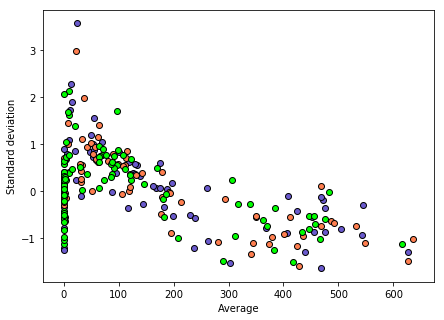

In [19]:
fig, axes = plt.subplots(1,1 ,figsize=(7, 5))
axes.scatter(F.loc[np.where(y_train== 0)][ 'avgL'], 
           F.loc[np.where(y_train== 0)]['skwT'], color='slateblue', edgecolor='k')
axes.scatter(F.loc[np.where(y_train== 1)][ 'avgL'], 
           F.loc[np.where(y_train== 1)]['skwT'], color='coral', edgecolor='k')
axes.scatter(F.loc[np.where(y_train== 2)][ 'avgL'], 
           F.loc[np.where(y_train== 2)]['skwT'], color='lime', edgecolor='k')

axes.set_ylabel('Standard deviation')
axes.set_xlabel('Average')
plt.show()

In [20]:
from sklearn.neighbors import KNeighborsClassifier
clf = KNeighborsClassifier()
clf.fit(X_train, y_train)

y_pred = clf.predict(X_test)

print('Accuracy %s' % accuracy_score(y_test, y_pred))
print('F1-score %s' % f1_score(y_test, y_pred, average=None))
print(classification_report(y_test, y_pred))

Accuracy 0.7407407407407407
F1-score [0.80555556 0.60606061 0.79487179]
              precision    recall  f1-score   support

           0       0.81      0.81      0.81        36
           1       0.67      0.56      0.61        36
           2       0.74      0.86      0.79        36

    accuracy                           0.74       108
   macro avg       0.74      0.74      0.74       108
weighted avg       0.74      0.74      0.74       108



In [21]:
# load libraries
import pydotplus
from sklearn import tree
from IPython.display import Image
import graphviz
from graphviz import Digraph
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import RandomizedSearchCV
import pydotplus
from sklearn import decomposition, datasets
from sklearn import tree
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV, cross_val_score
from sklearn.preprocessing import StandardScaler

In [22]:

clf = DecisionTreeClassifier(max_depth=8, random_state=42)
clf.fit(X_train, y_train)

y_pred = clf.predict(X_test)

print('Accuracy %s' % accuracy_score(y_test, y_pred))
print('F1-score %s' % f1_score(y_test, y_pred, average=None))
print(classification_report(y_test, y_pred))

Accuracy 0.9907407407407407
F1-score [0.98630137 1.         0.98591549]
              precision    recall  f1-score   support

           0       0.97      1.00      0.99        36
           1       1.00      1.00      1.00        36
           2       1.00      0.97      0.99        36

    accuracy                           0.99       108
   macro avg       0.99      0.99      0.99       108
weighted avg       0.99      0.99      0.99       108



In [28]:
result=pd.DataFrame(zip(X_train.columns[:], clf.feature_importances_),columns=['feature','importance'])
result.sort_values('importance',ascending=False).head(20)

,feature,importance
19,medL,0.500000
3,stdT,0.268277
6,varH,0.069177
8,avgH,0.042438
22,iqrL,0.030380
11,skwH,0.026244
5,skwT,0.023469
16,iqrC,0.017857
4,iqrT,0.010714
7,medH,0.008929


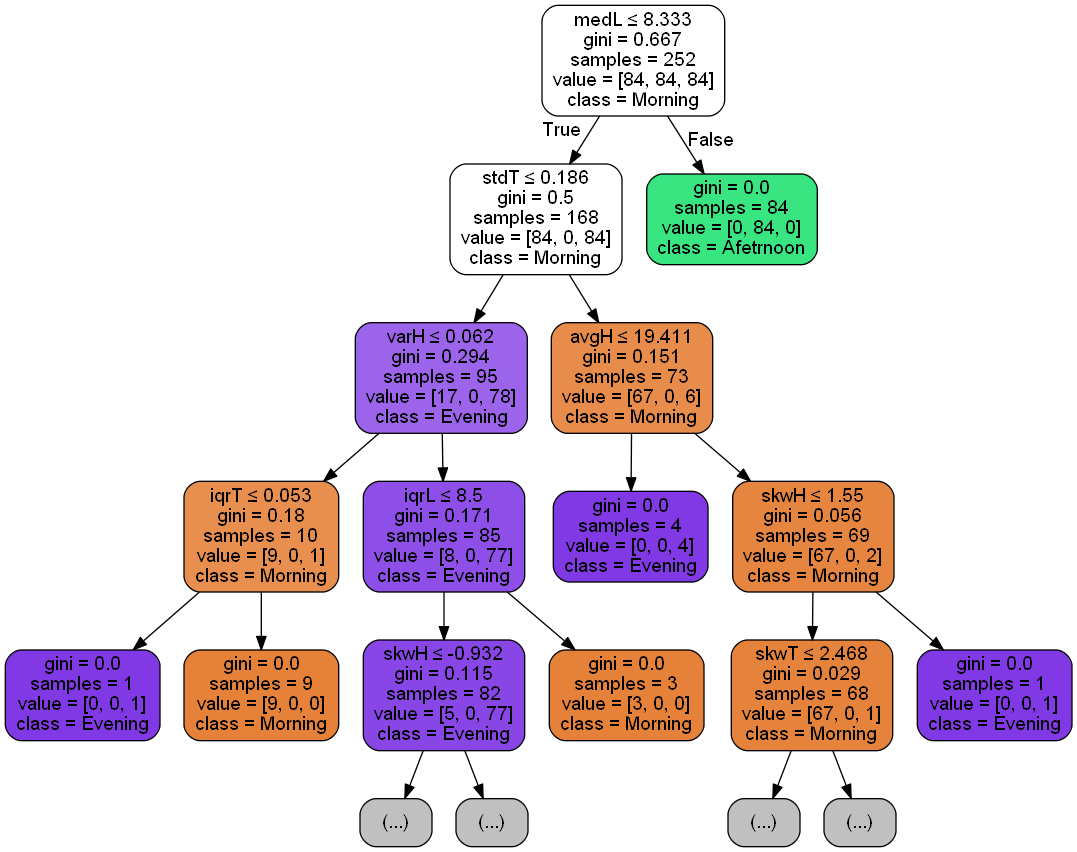

In [26]:

dot_data = tree.export_graphviz(clf, out_file=None,  
                                feature_names=X_train.columns[:], 
                                class_names=['Morning','Afetrnoon','Evening'],  
                                filled=True, rounded=True,  
                                special_characters=True,
                                max_depth=4)  
graph = pydotplus.graph_from_dot_data(dot_data)  
Image(graph.create_png())

In [64]:
## CNN feature based

In [65]:
print((n_timesteps, n_outputs, n_features))

NameError: name 'n_timesteps' is not defined

In [66]:
def build_cnn3(n_timesteps, n_outputs, n_features):
    model = Sequential()
    
    model.add(Conv1D(filters=16, kernel_size=8, activation='relu', input_shape=(n_timesteps, n_features)))
    model.add(BatchNormalization())
    model.add(Activation('relu'))
    
    model.add(Dropout(0.3))
    
    model.add(Conv1D(filters=32, kernel_size=5, activation='relu'))
    model.add(BatchNormalization())
    model.add(Activation('relu'))
    
    model.add(Dropout(0.3))
    
    model.add(Conv1D(filters=64, kernel_size=3, activation='relu'))
    model.add(BatchNormalization())
    model.add(Activation('relu'))
    
    model.add(Dropout(0.3))
    
    model.add(GlobalAveragePooling1D())
    
    model.add(Dense(n_outputs, activation='sigmoid'))
    model.compile(loss='sparse_categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
    
    return model

In [71]:
cnn3 = build_cnn3(X_train.values.shape[0], 
                  2, X_train.values.shape[1])

In [72]:
history_cnn3 = cnn3.fit(X_train, y_train, epochs=50, batch_size=mini_batch_size, callbacks=callbacks,
                      validation_data=(X_test, y_test)).history

ValueError: Error when checking input: expected conv1d_7_input to have 3 dimensions, but got array with shape (252, 24)